# Tutorial Objectives

In this tutorial, we will use the `DataArray` and `Dataset` objects, which are used to represent and manipulate spatial data, to practice organizing large global climate datasets and to understand variations in Earth's climate system.


# Setup


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xarray as xr
from pythia_datasets import DATASETS

In [2]:
#!python -m pip install xarray
#!pip install pythia-datasets

# Introducing the `DataArray` and `Dataset`

[Xarray](https://xarray.pydata.org/en/v2023.05.0/getting-started-guide/why-xarray.html) expands on the capabilities on [NumPy](https://numpy.org/doc/stable/user/index.html#user) arrays, providing a lot of streamlined data manipulation. It is similar in that respect to [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide), but whereas Pandas excels at working with tabular data, Xarray is focused on N-dimensional arrays of data (i.e. grids). Its interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces to provide functionality similar to netCDF-java's [Common Data Model (CDM)](https://docs.unidata.ucar.edu/netcdf-java/current/userguide/common_data_model_overview.html).

The `DataArray` is one of the basic building blocks of Xarray (see docs [here](http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataarray)). It provides a `numpy.ndarray`-like object that expands to provide two critical pieces of functionality:

1. Coordinate names and values are stored with the data, making slicing and indexing much more powerful
2. It has a built-in container for attribues

Here we'll initialize a `DataArray` object by wrapping a plain NumPy array, and explore a few of its properes.



In [3]:
rand_data = 283 + 5 * np.random.randn(5, 3, 4)
times_index = pd.date_range("2018-01-01", periods=5)
lats = np.linspace(25, 55, 3)
lons = np.linspace(-120, -60, 4)
temperature = xr.DataArray(
    rand_data, coords=[times_index, lats, lons], dims=["time", "lat", "lon"]
)
temperature.attrs["units"] = "kelvin"
temperature.attrs["standard_name"] = "air_temperature"
temperature

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[283.49902986, 282.52257561, 286.13215407, 285.31978388],
        [283.11560617, 280.24414874, 278.90985842, 280.46498601],
        [283.21766393, 280.04138392, 286.07531022, 282.30247196]],

       [[296.03473343, 277.76058234, 284.01182799, 276.29587133],
        [293.95594915, 288.43600825, 281.09816153, 275.95301697],
        [284.13549244, 273.69265939, 278.75132994, 282.30297674]],

       [[275.38745494, 280.16904363, 285.96732738, 284.51109842],
        [283.95538474, 280.14753971, 271.5893856 , 281.70662636],
        [277.77262551, 285.090693  , 279.22391817, 281.31779485]],

       [[287.6808858 , 282.51938871, 284.78156927, 291.12341337],
        [280.56127553, 292.02818725, 281.0208726 , 286.22101347],
        [281.13360826, 281.91145788, 281.2690759 , 275.72917821]],

       [[284.91329536, 288.2786349 , 290.72946231, 284.4866669 ],
        [286.78139998, 283.15420812, 279.16061521, 280.64748375],
        [282.33205839, 281.29211347, 286.77619052, 282.11509736]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

##### Attributes Are Not Preserved by Default!

Notice what happens if we perform a mathematical operation with the `DataArray`: the coordinate values persist, but the attributes are lost. This is done because it is very challenging to know if the attribute metadata is still correct or appropriate after arbitrary arithmetic operations.

To illustrate this, we'll do a simple unit conversion from Kelvin to Celsius:

In [4]:
temperature_in_celsius = temperature - 273.15
temperature_in_celsius

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[10.34902986,  9.37257561, 12.98215407, 12.16978388],
        [ 9.96560617,  7.09414874,  5.75985842,  7.31498601],
        [10.06766393,  6.89138392, 12.92531022,  9.15247196]],

       [[22.88473343,  4.61058234, 10.86182799,  3.14587133],
        [20.80594915, 15.28600825,  7.94816153,  2.80301697],
        [10.98549244,  0.54265939,  5.60132994,  9.15297674]],

       [[ 2.23745494,  7.01904363, 12.81732738, 11.36109842],
        [10.80538474,  6.99753971, -1.5606144 ,  8.55662636],
        [ 4.62262551, 11.940693  ,  6.07391817,  8.16779485]],

       [[14.5308858 ,  9.36938871, 11.63156927, 17.97341337],
        [ 7.41127553, 18.87818725,  7.8708726 , 13.07101347],
        [ 7.98360826,  8.76145788,  8.1190759 ,  2.57917821]],

       [[11.76329536, 15.1286349 , 17.57946231, 11.3366669 ],
        [13.63139998, 10.00420812,  6.01061521,  7.49748375],
        [ 9.18205839,  8.14211347, 13.62619052,  8.96509736]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

We usually wish to keep metadata with our dataset, even after manipulating the data. For example it can tell us what the units are of a variable of interest. So when you perform operations on your data, make sure to check that all the information you want is carried over. If it isn't, you can add it back in following the instructions in the section before this. For an in-depth discussion of how Xarray handles metadata, you can find more information in the Xarray documents [here](http://xarray.pydata.org/en/stable/getting-started-guide/faq.html#approach-to-metadata).


In [5]:
# pressure data
pressure_data = 1000.0 + 5 * np.random.randn(5, 3, 4)
pressure = xr.DataArray(
    pressure_data, coords=[times_index, lats, lons], dims=["time", "lat", "lon"]
)
pressure.attrs["units"] = "hPa"
pressure.attrs["standard_name"] = "air_pressure"
pressure

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[ 999.37077738, 1003.74596592, 1000.85646023,  998.69850812],
        [1004.80205996,  998.29948202, 1002.44908368, 1005.74563361],
        [ 996.97947656, 1006.98947142, 1006.81029112,  994.93291634]],

       [[ 993.8737481 , 1004.12276477, 1011.70463041, 1005.74139543],
        [ 997.05992611,  992.62305191,  992.32521041,  995.88408707],
        [ 994.47932716, 1001.53881812, 1003.29949471, 1002.65122892]],

       [[1002.56325874,  999.26605691,  989.8393407 , 1001.41231268],
        [ 996.99964579,  995.57815638,  995.60871106, 1004.85330076],
        [1002.5883969 , 1005.49560157,  994.64032287,  996.59285171]],

       [[ 998.01670585, 1010.73740334, 1003.24972905, 1004.86558144],
        [ 996.14506894,  999.38832586,  994.53084323,  996.9555163 ],
        [1005.60776709,  986.58756622,  999.37352988,  996.84926157]],

       [[1004.61277403, 1001.89580036,  996.71934667, 1005.71656213],
        [ 994.0537855 , 1001.64021559,  997.92144555, 1001.32710848],
        [1005.41551861,  999.66888662,  999.56039849, 1001.89343414]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

In [6]:
# combinate temperature and pressure DataArrays into a Dataset called 'ds'
ds = xr.Dataset(data_vars={"Temperature": temperature, "Pressure": pressure})
ds

<xarray.Dataset>
Dimensions:      (time: 5, lat: 3, lon: 4)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat          (lat) float64 25.0 40.0 55.0
  * lon          (lon) float64 -120.0 -100.0 -80.0 -60.0
Data variables:
    Temperature  (time, lat, lon) float64 283.5 282.5 286.1 ... 286.8 282.1
    Pressure     (time, lat, lon) float64 999.4 1.004e+03 ... 999.6 1.002e+03

In [7]:
# We can pull out any of the individual DataArray objects in a few different ways.
# Using the dictionary access like this:
ds["Temperature"]

<xarray.DataArray 'Temperature' (time: 5, lat: 3, lon: 4)>
array([[[283.49902986, 282.52257561, 286.13215407, 285.31978388],
        [283.11560617, 280.24414874, 278.90985842, 280.46498601],
        [283.21766393, 280.04138392, 286.07531022, 282.30247196]],

       [[296.03473343, 277.76058234, 284.01182799, 276.29587133],
        [293.95594915, 288.43600825, 281.09816153, 275.95301697],
        [284.13549244, 273.69265939, 278.75132994, 282.30297674]],

       [[275.38745494, 280.16904363, 285.96732738, 284.51109842],
        [283.95538474, 280.14753971, 271.5893856 , 281.70662636],
        [277.77262551, 285.090693  , 279.22391817, 281.31779485]],

       [[287.6808858 , 282.51938871, 284.78156927, 291.12341337],
        [280.56127553, 292.02818725, 281.0208726 , 286.22101347],
        [281.13360826, 281.91145788, 281.2690759 , 275.72917821]],

       [[284.91329536, 288.2786349 , 290.72946231, 284.4866669 ],
        [286.78139998, 283.15420812, 279.16061521, 280.64748375],
        [282.33205839, 281.29211347, 286.77619052, 282.11509736]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

In [8]:
# ... or using "dot" notation:
ds.Pressure

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)>
array([[[ 999.37077738, 1003.74596592, 1000.85646023,  998.69850812],
        [1004.80205996,  998.29948202, 1002.44908368, 1005.74563361],
        [ 996.97947656, 1006.98947142, 1006.81029112,  994.93291634]],

       [[ 993.8737481 , 1004.12276477, 1011.70463041, 1005.74139543],
        [ 997.05992611,  992.62305191,  992.32521041,  995.88408707],
        [ 994.47932716, 1001.53881812, 1003.29949471, 1002.65122892]],

       [[1002.56325874,  999.26605691,  989.8393407 , 1001.41231268],
        [ 996.99964579,  995.57815638,  995.60871106, 1004.85330076],
        [1002.5883969 , 1005.49560157,  994.64032287,  996.59285171]],

       [[ 998.01670585, 1010.73740334, 1003.24972905, 1004.86558144],
        [ 996.14506894,  999.38832586,  994.53084323,  996.9555163 ],
        [1005.60776709,  986.58756622,  999.37352988,  996.84926157]],

       [[1004.61277403, 1001.89580036,  996.71934667, 1005.71656213],
        [ 994.0537855 , 1001.64021559,  997.92144555, 1001.32710848],
        [1005.41551861,  999.66888662,  999.56039849, 1001.89343414]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

Global climate datasets can be very large with multiple variables, and DataArrays and Datasets are very useful tools for organizing, comparing and interpreting such data. However, sometimes we are not interested in examining a *global* dataset but wish to examine a specific time or location. For example, we might want to look at climate variables in a particular region of Earth, and potentially compare that to another region. In order to carry-out such analyses, it’s useful to be able to extract and compare subsets of data from a global dataset. 
You can explore multiple computational tools in `Xarray` that allow you to select data from a specific spatial and temporal range, like:g



*   **`.sel()`:** select data based on coordinate values or date
*   **`.interp()`:** interpolate to any latitude/longitude location to extract data
*   **`slice()`:** to select a range (or slice) along one or more coordinates, we can pass a Python slice object to `.sel()`


# Atmospheric Climate Systems
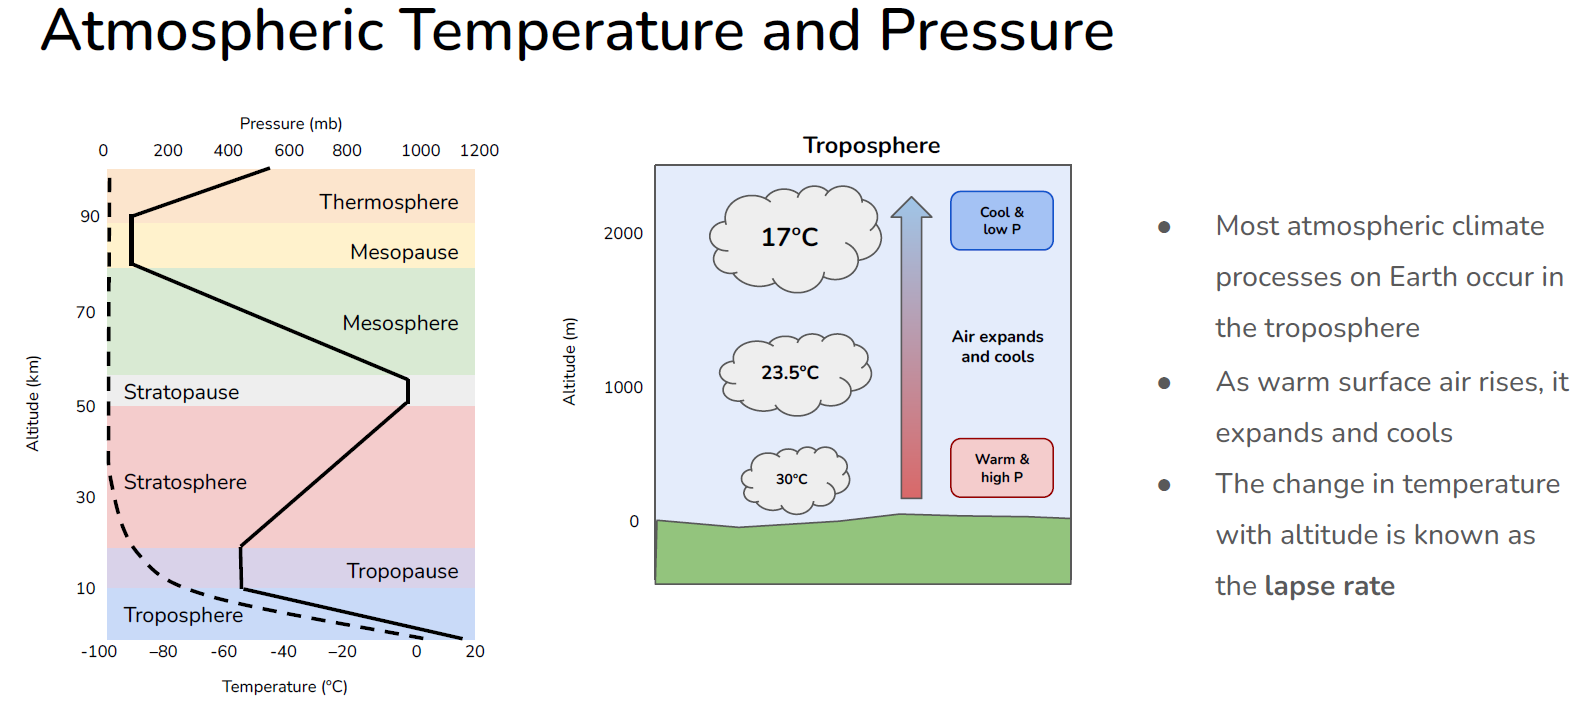

Many global climate datasets are stored as [NetCDF](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/what-is-netcdf-data.htm) (network Common Data Form) files. NetCDF is a file format for storing multidimensional variables such as temperature, humidity, pressure, wind speed, and direction. These types of files also include metadata that gives you information about the variables and dataset itself.

Xarray is closely linked with the netCDF data model, and it even treats netCDF as a 'first-class' file format. This means that Xarray can easily open netCDF datasets. However, these datasets need to follow some of Xarray's rules. One such rule is that coordinates must be 1-dimensional.

Here we're getting the data from Project Pythia's custom library of example data, which we already imported above with <code>from pythia_datasets import DATASETS</code>. The <code>DATASETS.fetch()</code> method will automatically download and cache (store) our example data file <code>NARR_19930313_0000.nc</code> locally.

In [9]:
filepath = DATASETS.fetch("NARR_19930313_0000.nc")
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
  * isobaric1                     (isobaric1) float32 100.0 125.0 ... 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

In [10]:
ds.isobaric1

<xarray.DataArray 'isobaric1' (isobaric1: 29)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  350.,
        400.,  450.,  500.,  550.,  600.,  650.,  700.,  725.,  750.,  775.,
        800.,  825.,  850.,  875.,  900.,  925.,  950.,  975., 1000.],
      dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03
Attributes:
    units:                   hPa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down

The `isobaric1` coordinate contains 29 pressure values (in hPa) corresponding to different pressures of the atmosphere. Recall from the video that pressure decreases with height in the atmosphere. Therefore, in our dataset lower atmospheric pressure values will correspond to higher altitudes. For each isobaric pressure value, there is data for all other variables in the dataset at that same pressure level of the atmosphere:

- **Wind**: the u and v components of the wind describe the direction of wind movement along a pressure level of the atmosphere. The U wind component is parallel to the x-axis (i.e. longitude) and the V wind component is parallel to the y- axis (i.e. latitude).
- **Temperature**: temperatures on a specific atmospheric pressure level
- **Geopotential Height**: the height of a given point in the atmosphere in units proportional to the potential energy of unit mass (geopotential) at this height relative to sea lrther.

Next, let's try calculating the mean of the temperature profile (temperature as a function of pressure) over a specific region. For this exercise, we will calculate the temperature profile over Colorado, USA. The bounds of Colorado are:

- x: -182km to 424km
- y: -1450km to -990km

If you look back at the values for `x` and `y` in our dataset, the units for these values are kilometers (km). Remember that they are also the coordinates for the `lat` and `lon` variables in our dataset. The bounds for Colorado correspond to the coordinates 37°N to 41°N and 102°W to 109°W.

In [11]:
# get the temperature data
temps = ds.Temperature_isobaric

# take just the spatial data we are interested in for Colorado
co_temps = temps.sel(x=slice(-182, 424), y=slice(-1450, -990))

# take the average
prof = co_temps.mean(dim=["x", "y"])
prof

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric1: 29)>
array([[215.078  , 215.76935, 217.243  , 217.82663, 215.83487, 216.10933,
        219.99902, 224.66118, 228.80576, 234.88701, 238.78503, 242.66309,
        246.44807, 249.26636, 250.84995, 253.37354, 257.0429 , 259.08398,
        260.97955, 262.98364, 264.82138, 266.5198 , 268.22467, 269.7471 ,
        271.18216, 272.66815, 274.13037, 275.54718, 276.97675]],
      dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

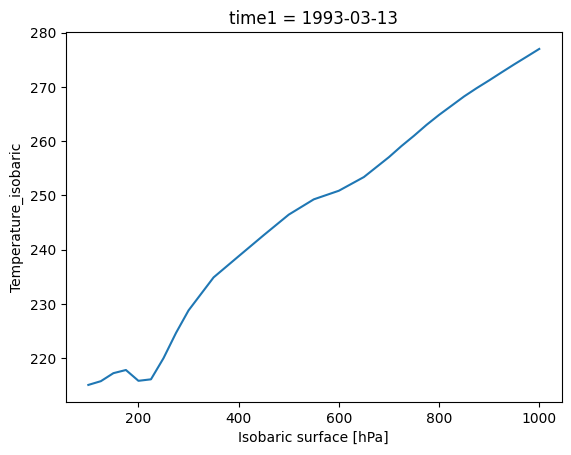

In [12]:
prof.plot()

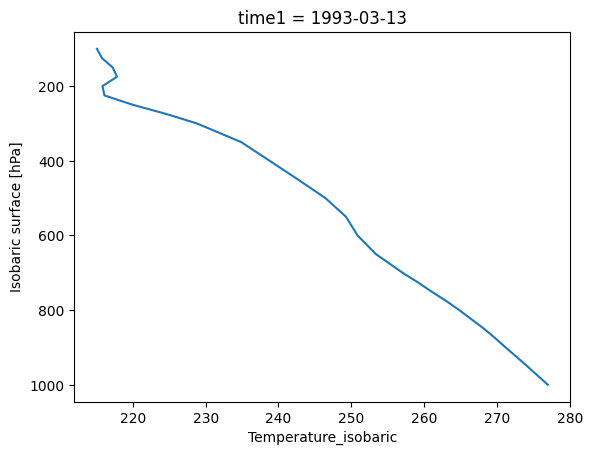

In [13]:
prof.plot(y="isobaric1", yincrease=False)

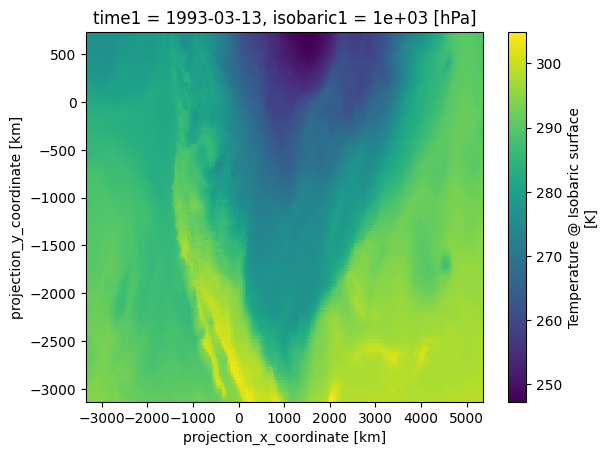

In [14]:
# Plotting 2D Data
temps.sel(isobaric1=1000).plot()

# Oceanic Climate Systems
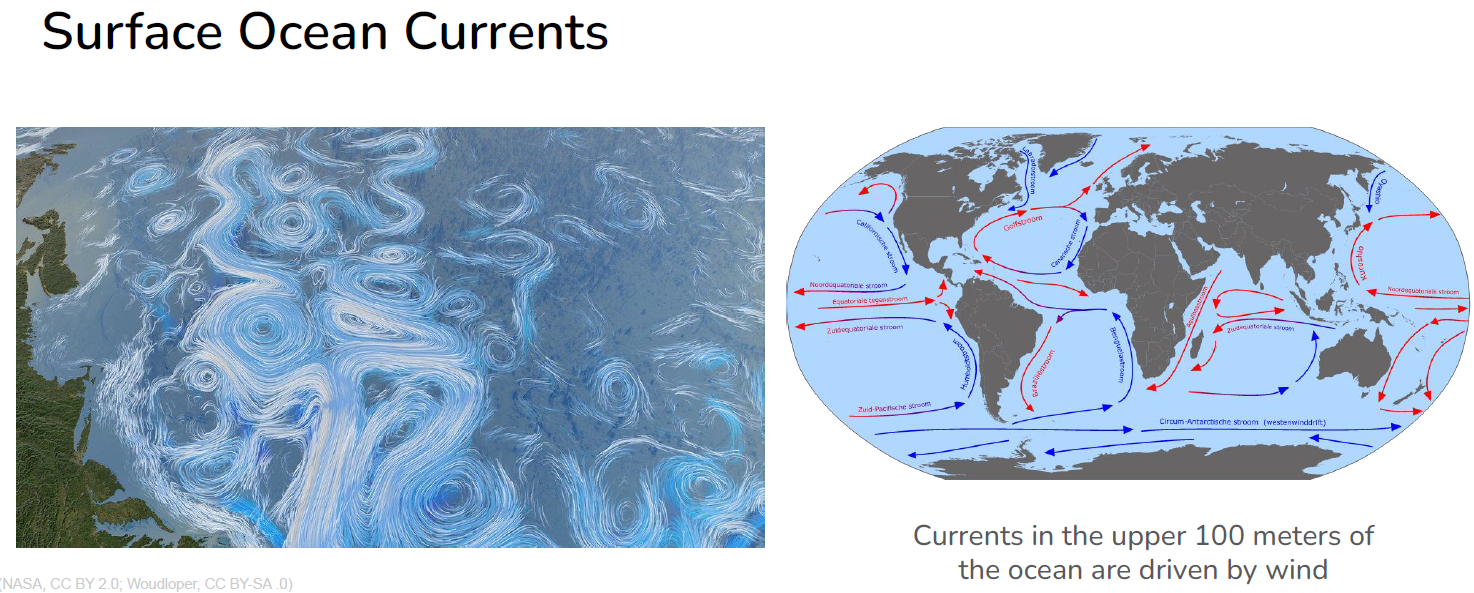

Arithmetic operations with a single `DataArray` automatically apply over all array values (like NumPy). This process is called **vectorization**.  First, let's open the monthly sea surface temperature (SST) data from the Community Earth System Model v2 (CESM2), which is a Global Climate Model.

In [15]:
filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
ds

C:\Users\weld.c\AppData\Local\miniconda3\envs\work\lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

In [16]:
# And look at the temeprature variable `tos`.
ds.tos

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
[11664000 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

##### Aggregation Methods

A very common step during data analysis is to summarize the data in question by computing aggregations like `sum()`, `mean()`, `median()`, `min()`, `max()` in which reduced data provide insight into the nature of the large dataset. For example, in the introductory video for this tutorial, we saw maps of the mean annual sea surface temperature and sea surface density. 


The following table summarizes some other built-in xarray aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``prod()``               | Compute product of elements            |
| ``sum()``                | Compute sum of elements                |
| ``argmin()``, ``argmax()``| Find index of minimum and maximum value |


Let's explore some of these aggregation methods.


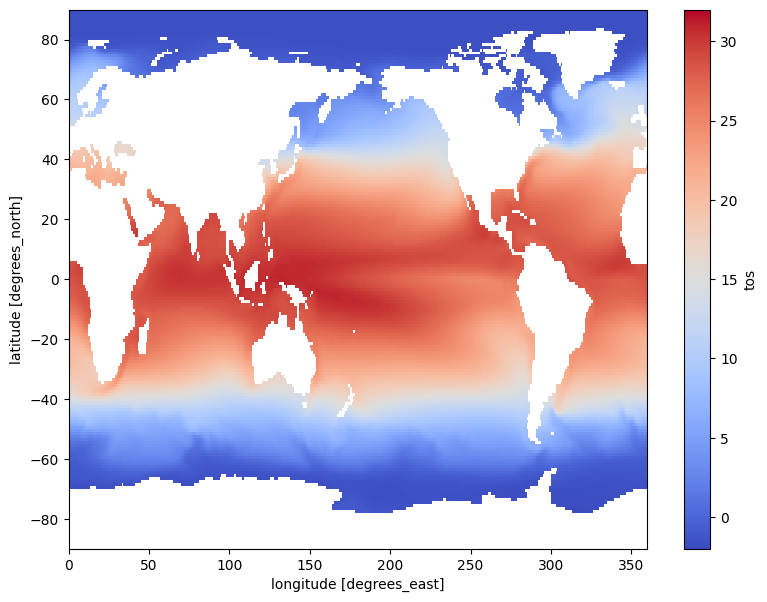

In [17]:
# Calculate the mean in time for all locations (i.e. the global mean annual SST), specify the time dimension as the dimension along which the mean should be calculated:
ds.tos.mean(dim="time").plot(size=7, vmin=-2, vmax=32, cmap="coolwarm")

You may notice that there are a lot of NaN values in the DataArray for tos. NaN isn’t a bad thing and it just means there isn’t data for those coordinates. In this case, there's no tos data for areas with land since this dataset only contains SST values.

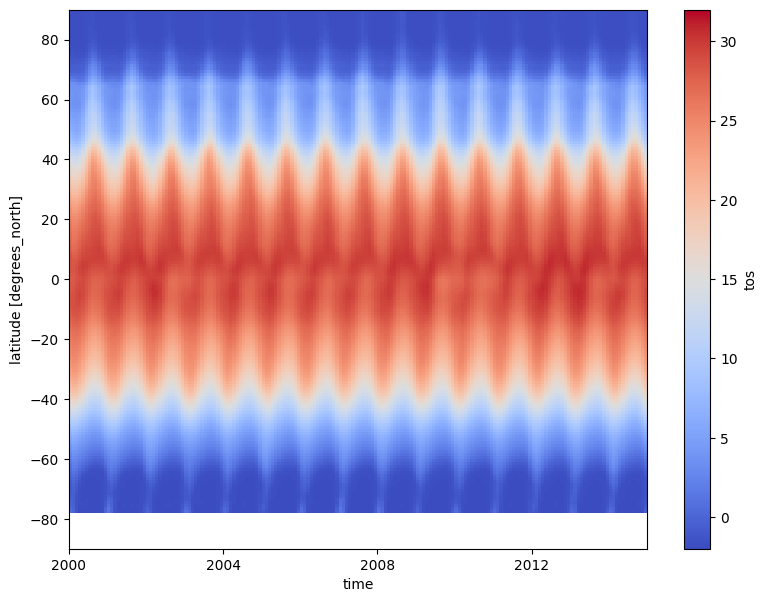

In [18]:
ds.tos.mean(dim="lon").plot(size=7, vmin=-2, vmax=32, cmap="coolwarm", x='time')

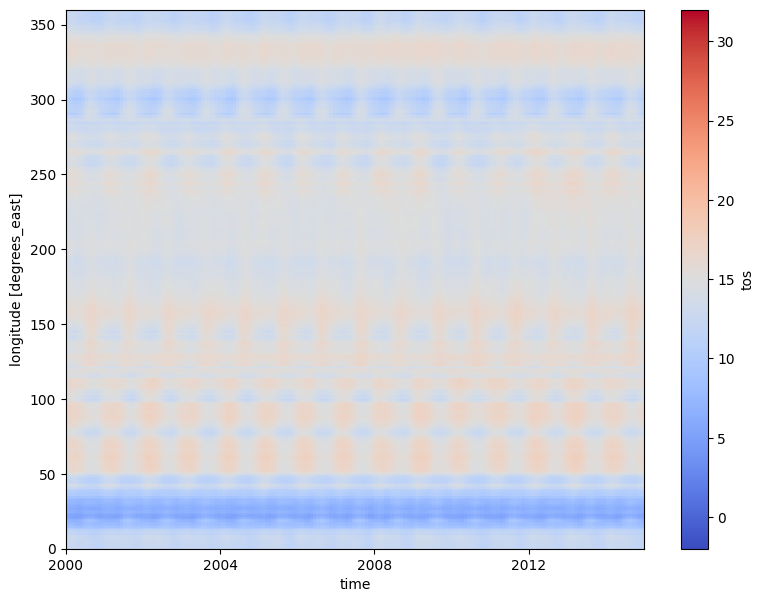

In [19]:
ds.tos.mean(dim="lat").plot(size=7, vmin=-2, vmax=32, cmap="coolwarm", x='time')

# Terrestrial Temperature & Rainfall
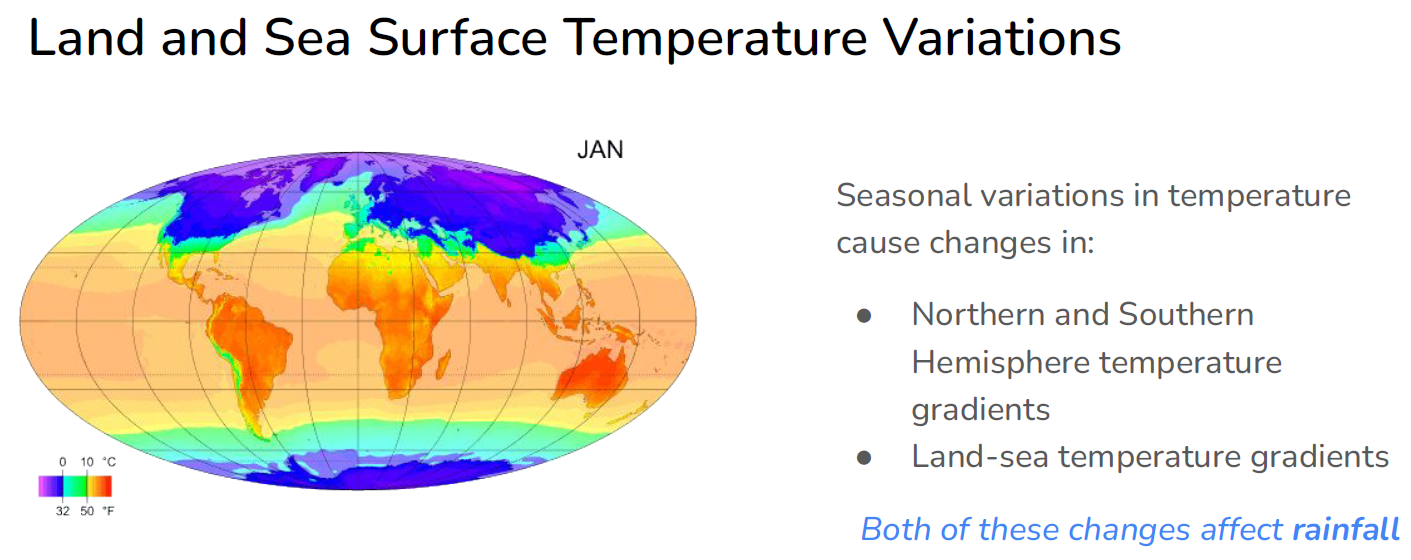

We are going to use `groupby` to remove the seasonal cycle ("climatology") from our dataset, which will allow us to better observe long-term trends in the data. See the [xarray `groupby` user guide](https://xarray.pydata.org/en/stable/user-guide/groupby.html) for more examples of what `groupby` can take as an input.

In [20]:
# Let's use the same data that we used in the previous tutorial (monthly SST data from CESM2):
ds

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 nan nan nan nan ... -1.746 -1.746 -1.746
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

Then, let's select a gridpoint closest to a specified lat-lon (in this case let's select 50ºN, 310ºE), and plot a time series of SST at that point. The annual cycle will be quite pronounced. Note that we are using the `nearest` method (see Tutorial 2 for a refresher) to find the points in our datasets closest to the lat-lon values we specify. What this returns may not match these inputs exactly.

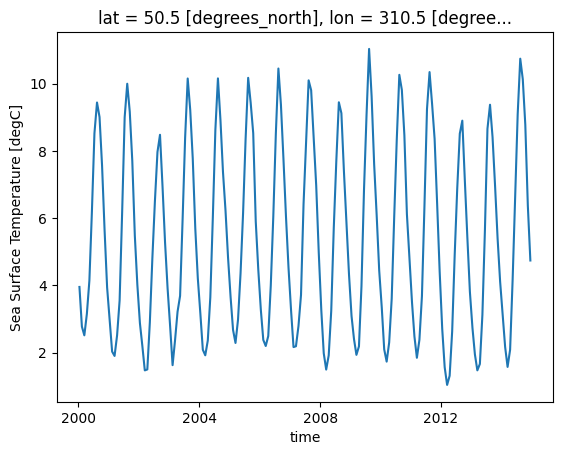

In [21]:
ds.tos.sel(lon=310, lat=50, method="nearest").plot()  # time range is 2000-01-15 to 2014-12-15

### Compute the Climatology
Let's calculate the climatology at every point in the dataset. To do so, we will use aggregation and will calculate the mean SST for each month:


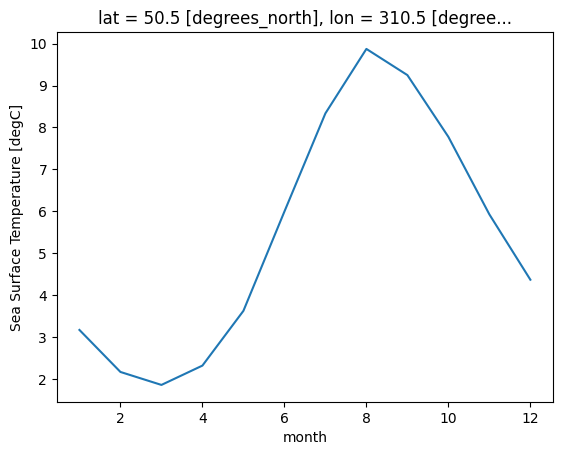

In [22]:
tos_clim = ds.tos.groupby("time.month").mean()
tos_clim.sel(lon=310, lat=50, method="nearest").plot()

We can now add a spatial dimension to this plot and look at the zonal mean climatology (the monthly mean SST at different latitudes):

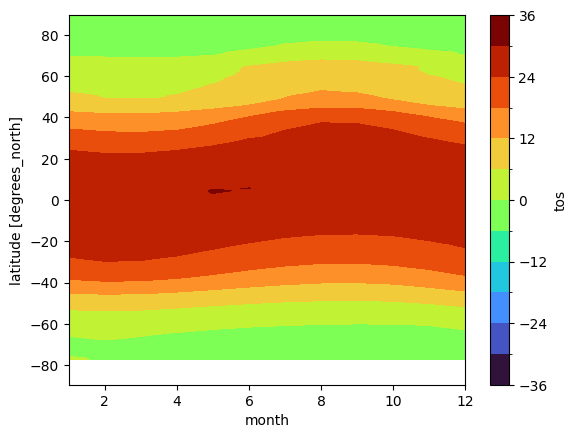

In [23]:
tos_clim.mean(dim="lon").transpose().plot.contourf(levels=12, cmap="turbo")

This gives us helpful information about the mean SST for each month, but it's difficult to asses the range of monthly temperatures throughout the year using this plot.
To better represent the range of SST, we can calculate and plot the difference between January and July climatologies:

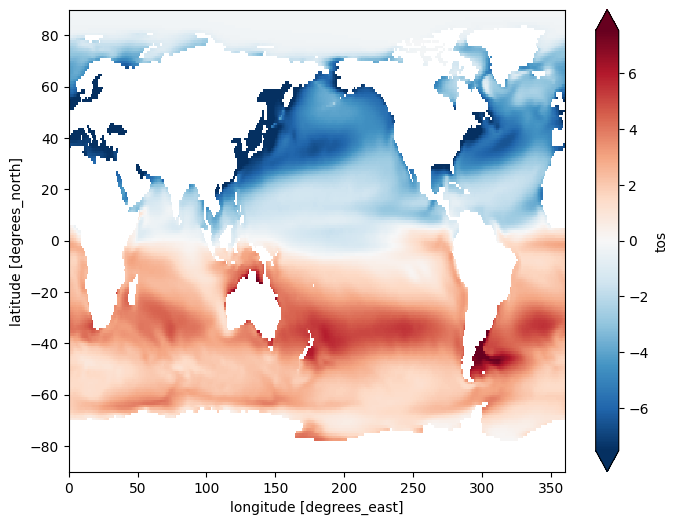

In [24]:
(tos_clim.sel(month=1) - tos_clim.sel(month=7)).plot(size=6, robust=True)

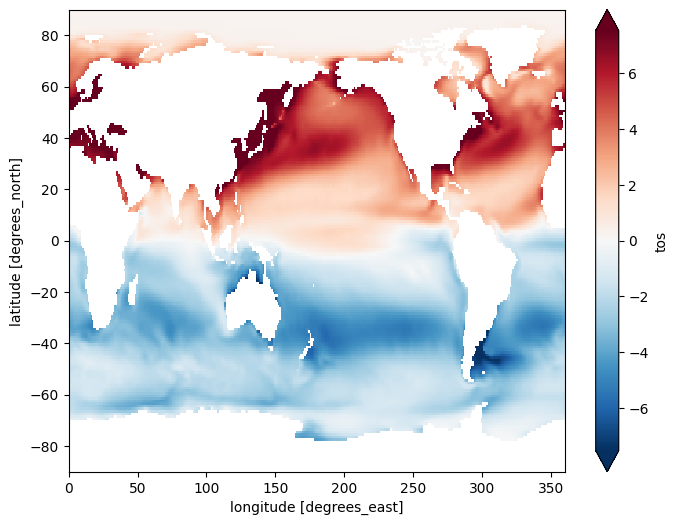

In [25]:
(tos_clim.sel(month=7) - tos_clim.sel(month=1)).plot(size=6, robust=True)

# Orbital Cycles
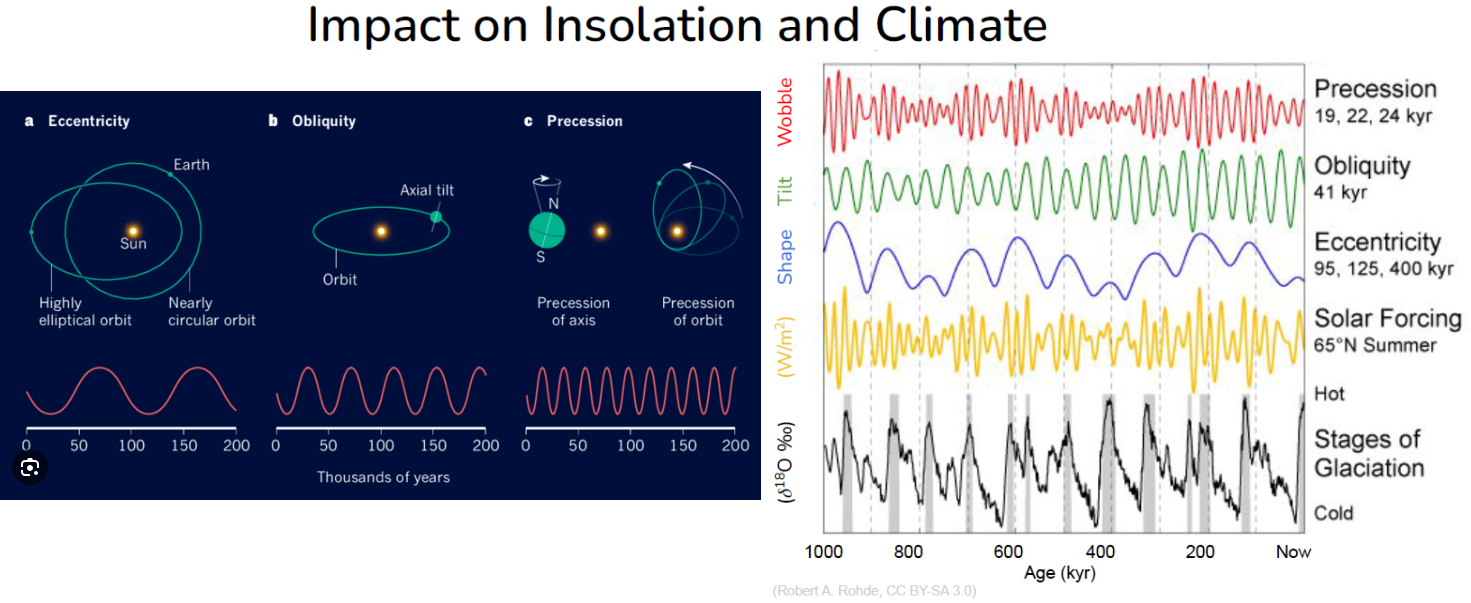

### Compute Anomaly
Let's use the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [26]:
ds

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 nan nan nan nan ... -1.746 -1.746 -1.746
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

We'll compute the climatology using xarray's `groupby` operation to split the SST data by month. Then, we'll remove this climatology from our original data to find the anomaly:

In [27]:
# group all data by month
gb = ds.tos.groupby("time.month")

# take the mean over time to get monthly averages
tos_clim = gb.mean(dim="time")

# subtract this mean from all data of the same month
tos_anom = gb - tos_clim
tos_anom

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01402271, -0.01401687, -0.01401365, ..., -0.01406252,
         -0.01404917, -0.01403356],
        [-0.01544118, -0.01544476, -0.01545036, ..., -0.0154475 ,
         -0.01544321, -0.01544082],
        [-0.01638114, -0.01639009, -0.01639998, ..., -0.01635301,
         -0.01636147, -0.01637137]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.01727939,  0.01713431,  0.01698041, ...,  0.0176847 ,
          0.01755834,  0.01742125],
        [ 0.0173862 ,  0.0172919 ,  0.01719594, ...,  0.01766813,
          0.01757395,  0.01748013],
        [ 0.01693714,  0.01687253,  0.01680517, ...,  0.01709175,
          0.0170424 ,  0.01699162]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.01506364,  0.01491845,  0.01476014, ...,  0.01545238,
          0.0153321 ,  0.01520228],
        [ 0.0142287 ,  0.01412642,  0.01402068, ...,  0.0145216 ,
          0.01442552,  0.01432824],
        [ 0.01320827,  0.01314461,  0.01307774, ...,  0.0133611 ,
          0.0133127 ,  0.01326215]]], dtype=float32)
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

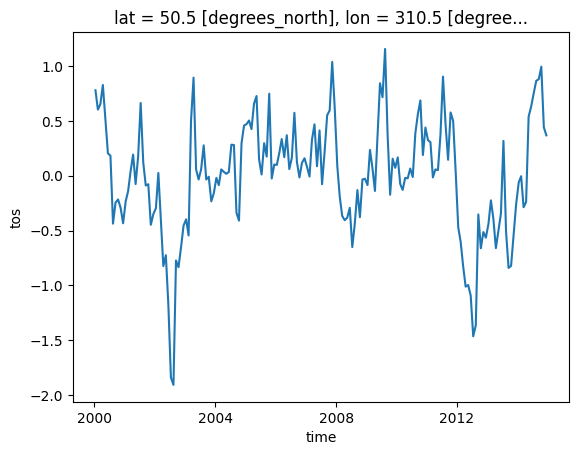

In [28]:
# Let's try plotting the anomaly from a specific location:
plt.ylabel("tos anomaly")
tos_anom.sel(lon=310, lat=50, method="nearest").plot()

Next, let's compute and visualize the mean global anomaly over time. We need to specify both `lat` and `lon` dimensions in the `dim` argument to `mean()`:

Text(0, 0.5, 'global mean tos anomaly')

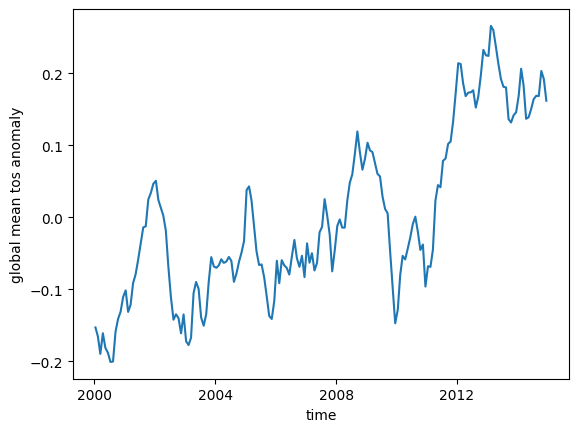

In [29]:
unweighted_mean_global_anom = tos_anom.mean(dim=["lat", "lon"])
unweighted_mean_global_anom.plot()
plt.ylabel("global mean tos anomaly")

Notice that we called our variable `unweighted_mean_global_anom`. Next, we are going to compute the  `weighted_mean_global_anom`. Why do we need to weight our data? Grid cells with the same range of degrees latitude and longitude are not necessarily same size. Specifically, grid cells closer to the equator are much larger than those near the poles, as seen in the figure below (Djexplo, 2011, CC-BY). 

<img src="images/t6_area_average.png" alt="area by latitude" class="bg-primary" width="100%">


Therefore, an operation which combines grid cells of different size is not scientifically valid unless each cell is weighted by the size of the grid cell. Xarray has a convenient [`.weighted()`](https://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions) method to accomplish this.

In [30]:
# Let's first load the grid cell area data from another CESM2 dataset that contains the weights for the grid cells:
filepath2 = DATASETS.fetch("CESM2_grid_variables.nc")
areacello = xr.open_dataset(filepath2).areacello
areacello

<xarray.DataArray 'areacello' (lat: 180, lon: 360)>
[64800 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/17)
    cell_methods:   area: sum
    comment:        TAREA
    description:    Cell areas for any grid used to report ocean variables an...
    frequency:      fx
    id:             areacello
    long_name:      Grid-Cell Area for Ocean Variables
    ...             ...
    time_label:     None
    time_title:     No temporal dimensions ... fixed field
    title:          Grid-Cell Area for Ocean Variables
    type:           real
    units:          m2
    variable_id:    areacello

In [31]:
# Let's calculate area-weighted mean global anomaly:
weighted_mean_global_anom = tos_anom.weighted(areacello).mean(dim=["lat", "lon"])

Text(0, 0.5, 'global mean tos anomaly')

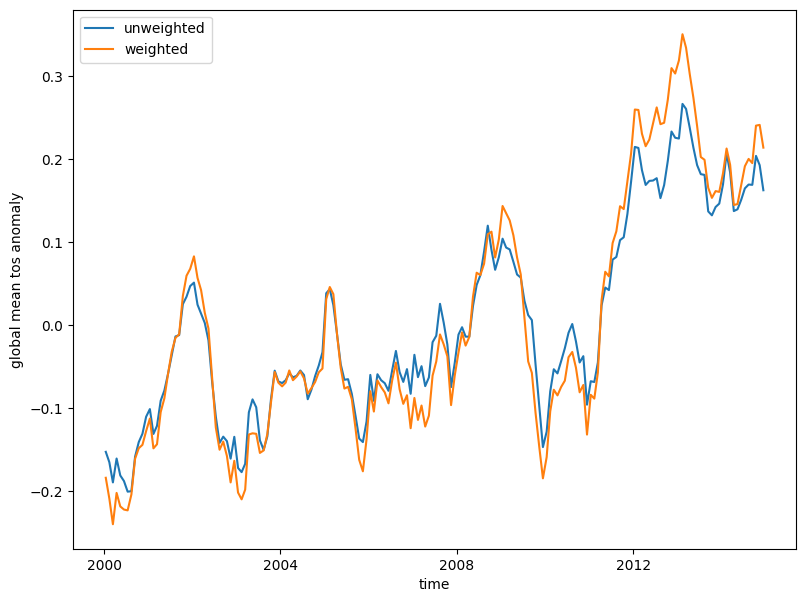

In [32]:
unweighted_mean_global_anom.plot(size=7)
weighted_mean_global_anom.plot()
plt.legend(["unweighted", "weighted"])
plt.ylabel("global mean tos anomaly")

# Carbon Cycle & the Greenhouse Effect
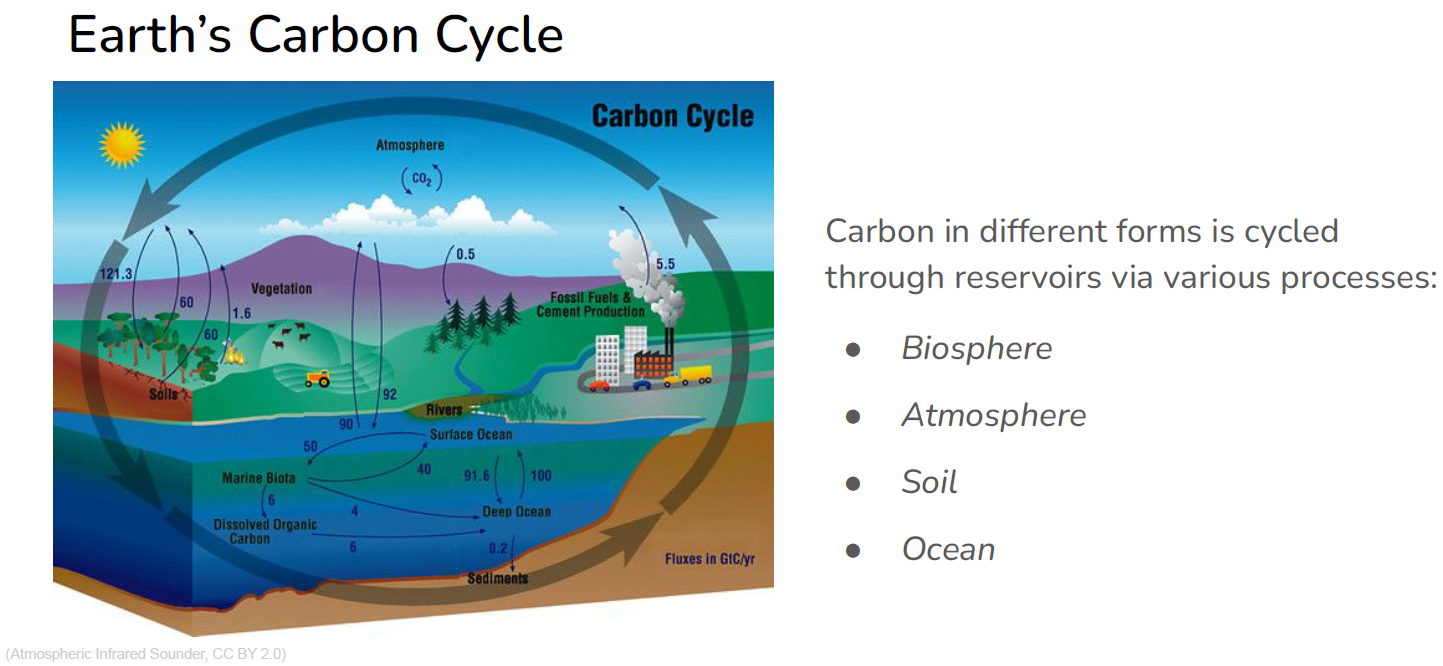

# Climate Feedbacks
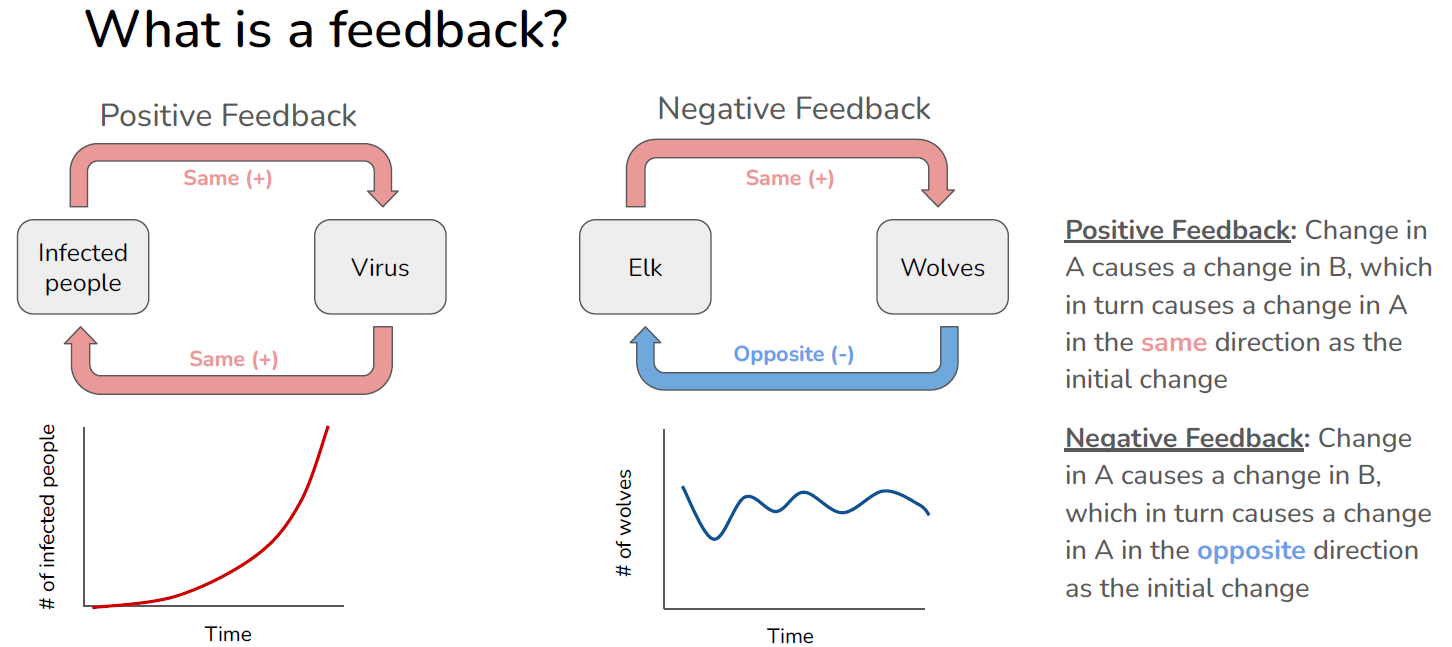

# Past, Present & Future Climate
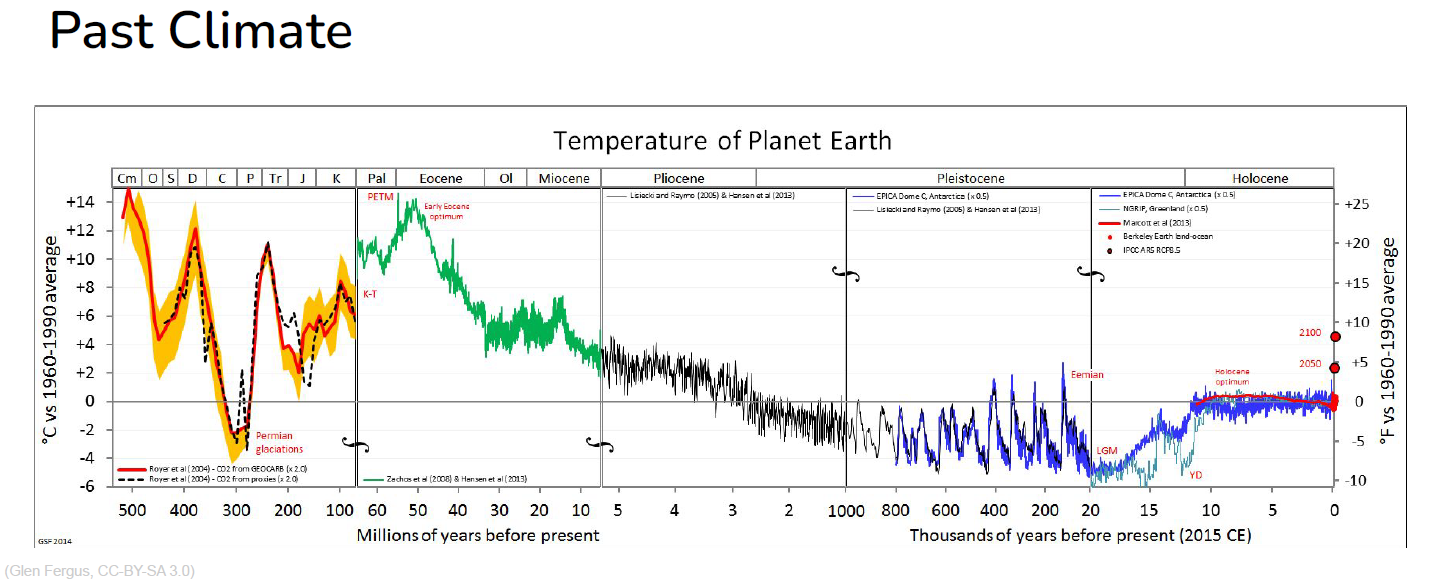
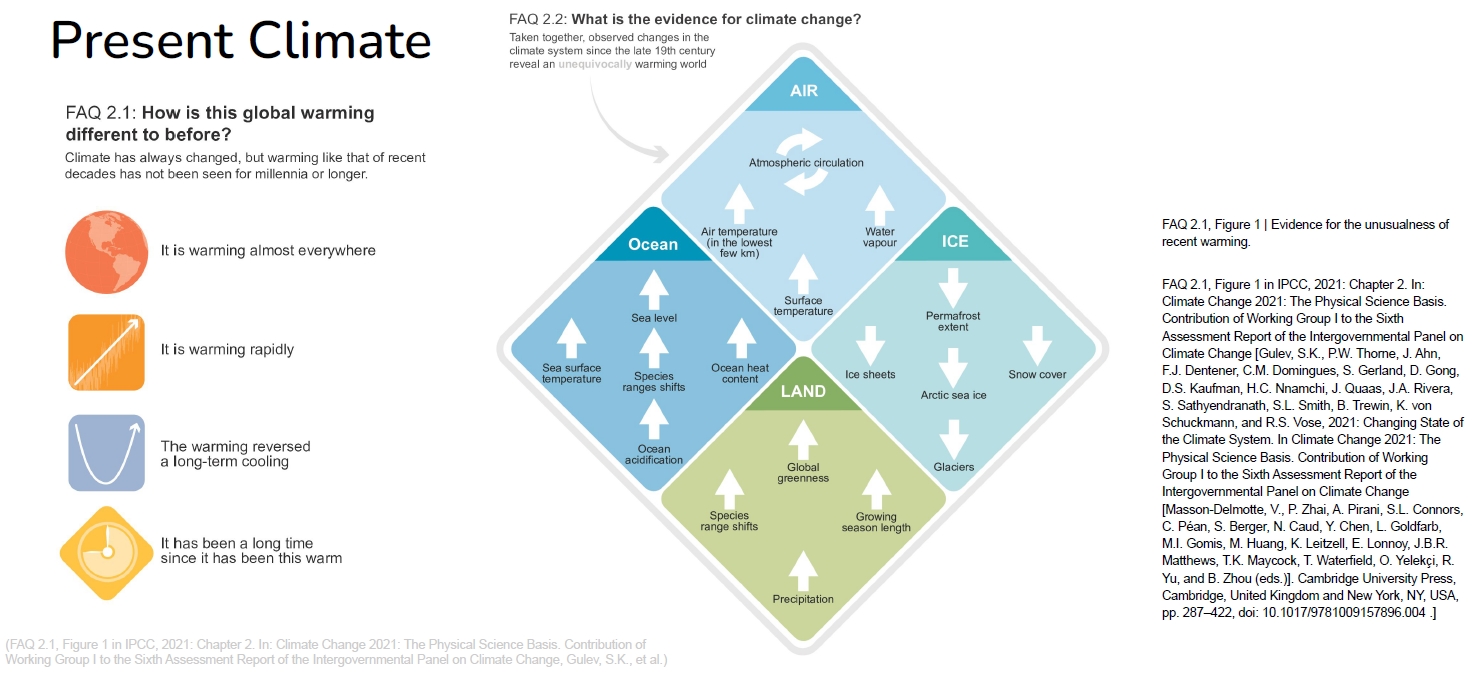
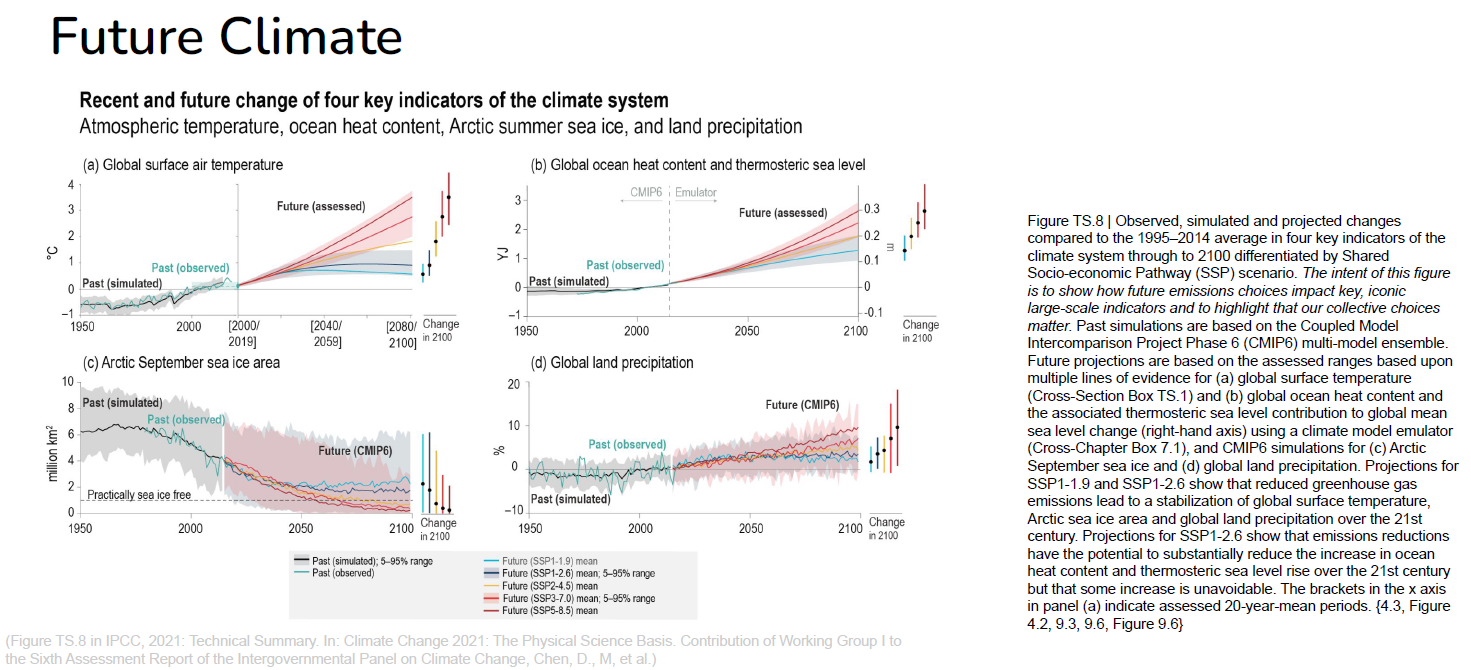

# Resources
Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/xarray-intro.html).